# Udacity DAND Project 1: Deck Building

## Setup
Prior to doing any analysis, we first have to setup our card decks. I used pandas to come up with a dictionary with cards paired with their respective values. This way I can place them into a Pandas series to run functions for analysis.

Besides the initial deck setup, I also created a helper function named _shows_stats_ to display several descriptive stats on a data set.

In [1]:
%matplotlib inline
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

suits = ['s', 'h', 'c', 'd']
ranks = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'K', 'Q', 'J']
cards = [rank+suit for suit in suits for rank in ranks]
deck = {}
samples = [["8c", "Js", "2d"],
["Jh", "Kh", "10s"],
["3d", "2h", "5c"],
["Js", "3c", "10d"],
["Jd", "5s", "4s"],
["Ad", "Jc", "10c"],
["10c", "6s", "7h"],
["Qd", "Jc", "Jd"],
["3h", "8d", "4d"],
["9c", "8h", "7c"],
["Ac", "8s", "2d"],
["4h", "Jc", "5d"],
["9d", "Kc", "Js"],
["8h", "8d", "7c"],
["3h", "Qd", "6h"],
["Qh", "2d", "Ah"],
["3s", "5h", "2h"],
["5s", "6d", "6s"],
["Ks", "Ad", "4d"],
["8d", "8h", "As"],
["6d", "9d", "Qh"],
["Ad", "Ah", "Ks"],
["5h", "8c", "10h"],
["6d", "9c", "Ad"],
["Jh", "7c", "3c"],
["5h", "Qc", "4s"],
["7h", "8h", "Kh"],
["4h", "5s", "Ac"],
["6c", "Jc", "2h"],
["Qh", "Jc", "8s"]]

for card in cards:
    if card[0] == 'A':
        deck[card] = 1
    elif card[0] in ['1', 'K', 'Q', 'J']:
        deck[card] = 10
    else:
        deck[card] = int(card[0])

deck_series = pd.Series(deck)

def show_stats(data, ddof=1):
    mean = data.mean()
    median = data.median()
    var = data.var()
    std = data.std(ddof=ddof)
    
    result = "Mean: {} Median: {} Variance: {} Standard Deviation: {}".format(mean, median, var, std)
    return result

## 1: Single Card Draw Histogram and Descriptive Stats.

Now with our environment created, we can get started on doing some analysis.

The first question asks to display a histogram of the relative frequencies of a card value for a single draw, as well as several descriptive statistics on the values for the distribution. That information is displayed in the below cell.

'Mean: 6.53846153846 Median: 7.0 Variance: 10.1357466063 Standard Deviation: 3.15290792799'

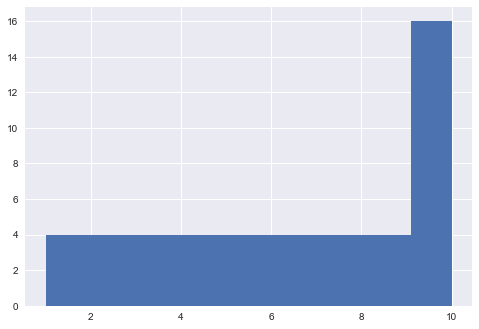

In [2]:
deck_series.hist()
show_stats(deck_series, ddof=0)

## 2: Descriptive Stats for Three-Card Sums

The next step requires us to create some samples of three-card sums. We already have a set of 30 samples provided to use, so we don't have to create our own. We will then proceed to look at two measures of variability (mean and median) and central tendency (variance and standard deviation).

In [3]:
sum_samples = pd.Series([sum(map(deck.get, sample)) for sample in samples])
show_stats(sum_samples)

'Mean: 19.4666666667 Median: 19.0 Variance: 35.3609195402 Standard Deviation: 5.94650481714'

## 3: Histogram Comparison Between Single-Card and Three-Card Sum Draws

Lets take a look at the histogram for our three-card sums.

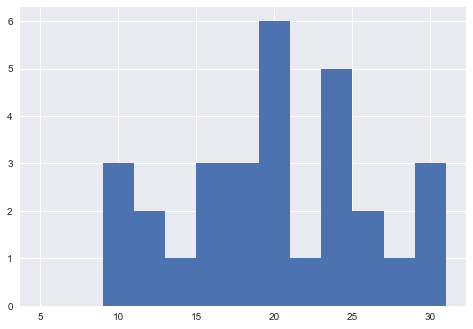

In [4]:
sum_samples.hist(bins=range(5, 32, 2))

While still somewhat scattered, the three-card sum distribution clearly shows some central tendency in its distribution. This differs from the skewed graph shown by our original distribution. As we increase our number of trials, the sampling distribution will center around the mean of the original frequency distribution. This is an observation of the central limit theorem. We can see this by either turning the sums of our three-card sum into means and getting the mean of that distribution, or even multiplying the mean of the original distribution by the number of samples that we took _(in this case, 6.54 * 3 = 19.62, just 0.16 off from our three-card sum mean)._ Note that each card draw does affect our original distribution frequency; once you take a card out the deck, you can't draw it again, thus changing our original probabilities.

## 4: Estimating Probability of Values

To find the values within 90% of our distribution, we find the z-score for both ends of the tail.

In [5]:
z_high, z_low = st.norm.ppf([.95, .05])
lower_score = (z_low * sum_samples.std()) + sum_samples.mean()
higher_score = (z_high * sum_samples.std()) + sum_samples.mean()
print("Lowest Score: {} - Upper Score: {}".format(round(lower_score), round(higher_score)))

Lowest Score: 10.0 - Upper Score: 29.0


Next, we find the probability of drawing at least a 20 from our three-card sum. We essentially do the inverse to finding the z-score, then subtract by 1 to get the left side of the curve.

In [6]:
score = 19.5
z_score = (score - sum_samples.mean())/sum_samples.std()
prob = 1 - st.norm.cdf(z_score)
print("The probability of getting a sum of 20 is {:.2%}".format(prob))

The probability of getting a sum of 20 is 49.78%
